# Question C

#### 1. (1 point) Perform appropriate preprocessing on the data (for eg: normalization) and visualize any 10 samples from the test dataset.

importing dataset


In [8]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

train_data = pd.read_csv("fashion-mnist_train.csv")
test_data = pd.read_csv("fashion-mnist_test.csv")

train_data = train_data[:8000]
test_data = test_data[:2000]


normalizing features

In [9]:
X_train = train_data.iloc[:, 1:].values / 255.0
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values / 255.0
y_test = test_data.iloc[:, 0].values


printing 10 samples

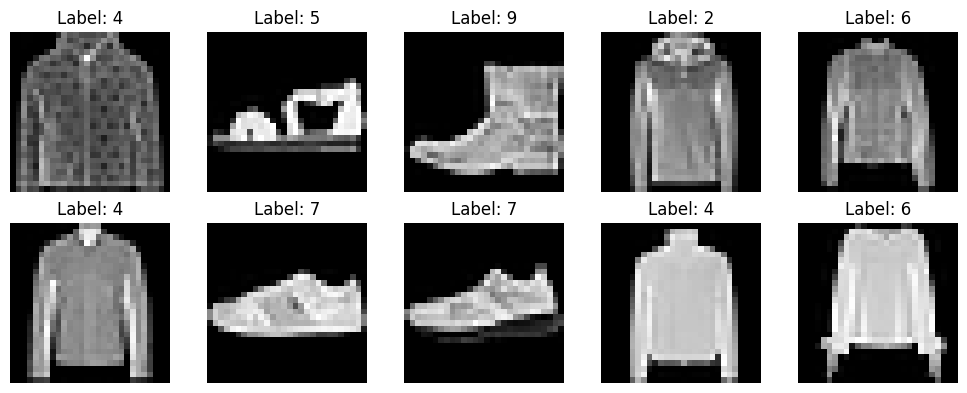

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 4))
for i, idx in enumerate(np.random.choice(len(X_test), 10, replace=False)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y_test[idx]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


#### 2. (4 points) Train a MLP Classifier from sklearn’s neural network module on the training dataset. The network should have 3 layers of size [128, 64, 32], should be trained for 100 iterations using an ‘adam’ solver with a batch size of 128 and learning rate of 2e-5. Train it using all the 4 activation functions i.e. ‘logistic’, Page 3‘tanh’, ‘relu’ and ‘identity’. For each activation function, plot the training loss vs epochs and validation loss vs epochs curves and comment on which activation function gave the best performance on the test set in the report.

importing other necessary libraries

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import numpy as np


function to train MLP classifiers with the above given input parammeters

In [12]:
def train_mlp_with_activation(activation, X_train, y_train, X_test, y_test):
    model = MLPClassifier(hidden_layer_sizes=(128, 64, 32),
                          activation=activation,
                          solver='adam',
                          max_iter=100,
                          batch_size=128,
                          learning_rate_init=2e-5,
                          random_state=42,
                          verbose=True)
    
    training_loss = []
    validation_loss = []
    
    for epoch in range(100):
        model.partial_fit(X_train, y_train, classes=np.unique(y_train))
        
        train_loss = log_loss(y_train, model.predict_proba(X_train))
        val_loss = log_loss(y_test, model.predict_proba(X_test))
        
        training_loss.append(train_loss)
        validation_loss.append(val_loss)
    
    plt.plot(training_loss, label=f"{activation} - Training Loss")
    plt.plot(validation_loss, label=f"{activation} - Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"Training and Validation Loss with {activation} Activation")
    plt.show()
    
    
    
    
    return model, validation_loss[-1]


trainig MLP cllassifiers

using activation functions ['logistic', 'tanh', 'relu', 'identity'] to demonstate and see which one performs the best

Training MLP with logistic activation function...
Iteration 1, loss = 2.33665113
Iteration 1, loss = 2.32858293
Iteration 1, loss = 2.32165893
Iteration 1, loss = 2.31576777
Iteration 1, loss = 2.31069091
Iteration 1, loss = 2.30622094
Iteration 1, loss = 2.30217538
Iteration 1, loss = 2.29839537
Iteration 1, loss = 2.29474405
Iteration 1, loss = 2.29110483
Iteration 1, loss = 2.28737996
Iteration 1, loss = 2.28348942
Iteration 1, loss = 2.27936992
Iteration 1, loss = 2.27497236
Iteration 1, loss = 2.27025807
Iteration 1, loss = 2.26519693
Iteration 1, loss = 2.25976765
Iteration 1, loss = 2.25395778
Iteration 1, loss = 2.24776195
Iteration 1, loss = 2.24117994
Iteration 1, loss = 2.23421613
Iteration 1, loss = 2.22687985
Iteration 1, loss = 2.21918559
Iteration 1, loss = 2.21115253
Iteration 1, loss = 2.20280384
Iteration 1, loss = 2.19416577
Iteration 1, loss = 2.18526671
Iteration 1, loss = 2.17613630
Iteration 1, loss = 2.16680471
Iteration 1, loss = 2.15730193
Iteration 1, loss = 

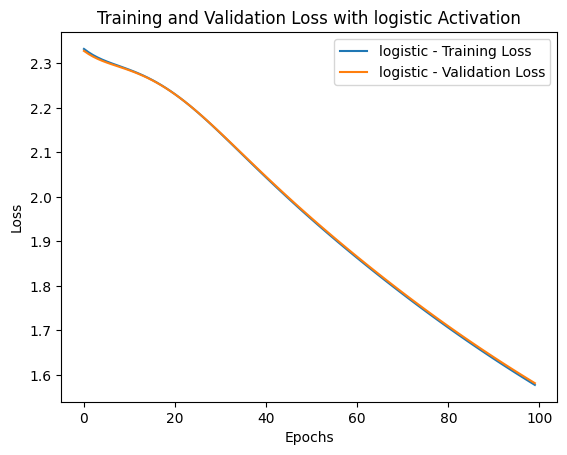

Training MLP with tanh activation function...
Iteration 1, loss = 2.22439160
Iteration 1, loss = 1.91031661
Iteration 1, loss = 1.69187991
Iteration 1, loss = 1.53580878
Iteration 1, loss = 1.41838819
Iteration 1, loss = 1.32739378
Iteration 1, loss = 1.25449670
Iteration 1, loss = 1.19404568
Iteration 1, loss = 1.14252391
Iteration 1, loss = 1.09770725
Iteration 1, loss = 1.05810408
Iteration 1, loss = 1.02266033
Iteration 1, loss = 0.99061141
Iteration 1, loss = 0.96139906
Iteration 1, loss = 0.93461194
Iteration 1, loss = 0.90993736
Iteration 1, loss = 0.88712476
Iteration 1, loss = 0.86596300
Iteration 1, loss = 0.84626894
Iteration 1, loss = 0.82788242
Iteration 1, loss = 0.81066385
Iteration 1, loss = 0.79449209
Iteration 1, loss = 0.77926244
Iteration 1, loss = 0.76488440
Iteration 1, loss = 0.75127969
Iteration 1, loss = 0.73838030
Iteration 1, loss = 0.72612690
Iteration 1, loss = 0.71446747
Iteration 1, loss = 0.70335616
Iteration 1, loss = 0.69275240
Iteration 1, loss = 0.68

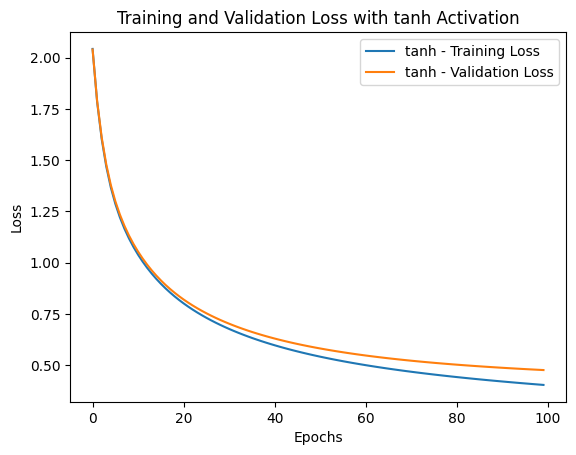

Training MLP with relu activation function...
Iteration 1, loss = 2.20846996
Iteration 1, loss = 2.04457735
Iteration 1, loss = 1.88389218
Iteration 1, loss = 1.72419667
Iteration 1, loss = 1.57608885
Iteration 1, loss = 1.44401103
Iteration 1, loss = 1.33107657
Iteration 1, loss = 1.23644492
Iteration 1, loss = 1.15662302
Iteration 1, loss = 1.08952138
Iteration 1, loss = 1.03332243
Iteration 1, loss = 0.98536492
Iteration 1, loss = 0.94293370
Iteration 1, loss = 0.90508248
Iteration 1, loss = 0.87163123
Iteration 1, loss = 0.84239756
Iteration 1, loss = 0.81648445
Iteration 1, loss = 0.79341447
Iteration 1, loss = 0.77262708
Iteration 1, loss = 0.75372706
Iteration 1, loss = 0.73636676
Iteration 1, loss = 0.72034717
Iteration 1, loss = 0.70558476
Iteration 1, loss = 0.69190224
Iteration 1, loss = 0.67922572
Iteration 1, loss = 0.66739768
Iteration 1, loss = 0.65634520
Iteration 1, loss = 0.64601425
Iteration 1, loss = 0.63630924
Iteration 1, loss = 0.62714617
Iteration 1, loss = 0.61

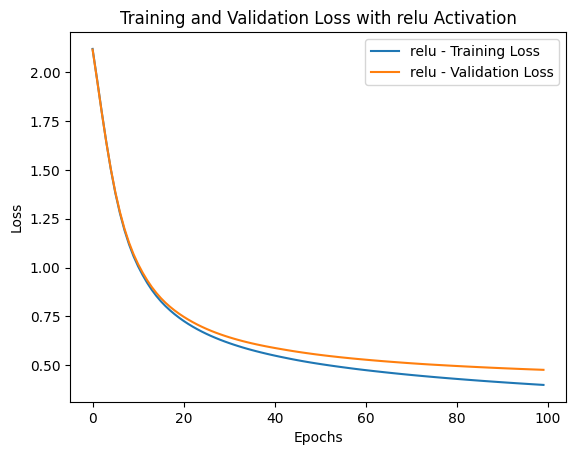

Training MLP with identity activation function...
Iteration 1, loss = 2.32274223
Iteration 1, loss = 1.84712341
Iteration 1, loss = 1.54711814
Iteration 1, loss = 1.34362437
Iteration 1, loss = 1.20380732
Iteration 1, loss = 1.10270433
Iteration 1, loss = 1.02595931
Iteration 1, loss = 0.96534306
Iteration 1, loss = 0.91595006
Iteration 1, loss = 0.87471726
Iteration 1, loss = 0.83964189
Iteration 1, loss = 0.80935633
Iteration 1, loss = 0.78288884
Iteration 1, loss = 0.75952442
Iteration 1, loss = 0.73872148
Iteration 1, loss = 0.72006014
Iteration 1, loss = 0.70320891
Iteration 1, loss = 0.68790225
Iteration 1, loss = 0.67392482
Iteration 1, loss = 0.66110021
Iteration 1, loss = 0.64928245
Iteration 1, loss = 0.63834974
Iteration 1, loss = 0.62819956
Iteration 1, loss = 0.61874500
Iteration 1, loss = 0.60991182
Iteration 1, loss = 0.60163620
Iteration 1, loss = 0.59386291
Iteration 1, loss = 0.58654393
Iteration 1, loss = 0.57963723
Iteration 1, loss = 0.57310589
Iteration 1, loss = 

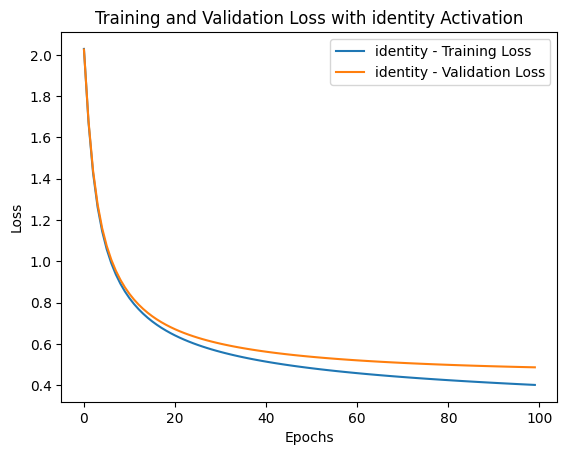

In [13]:
activations = ['logistic', 'tanh', 'relu', 'identity']
results = {}

for activation in activations:
    print(f"Training MLP with {activation} activation function...")
    model, final_val_loss = train_mlp_with_activation(activation, X_train, y_train, X_test, y_test)
    results[activation] = final_val_loss


#### Analysing the above plots:
##### from the above plots of traing loss and validation loass we can see that both the losses decreases with every epoches and ultimmatelty comes to zero except for the llogictic loss withh shows a tratic decrease in loss this  is because of the nature of the function itself from the plos above we can conclude that the validation loss for the relu activation function is the least of all so it will perform the best for 100 epoches 

In [14]:
print("Final Validation Loss for each activation function:")
for activation, val_loss in results.items():
    print(f"{activation}: {val_loss}")

best_activation = min(results, key=results.get)
print(f"\nBest performing activation function on the test set: {best_activation}")


Final Validation Loss for each activation function:
logistic: 1.5817063724033893
tanh: 0.47586343383734353
relu: 0.47545178821291817
identity: 0.4872827851342347

Best performing activation function on the test set: relu


| Activation Function | Final Validation Loss       |
|---------------------|-----------------------------|
| Logistic            | 1.5817063724033893          |
| Tanh                | 0.47586343383734353         |
| ReLU                | 0.4754517882129181          |
| Identity            | 0.48728278513423456         |

**Best performing activation function on the test set:** ReLU


Performance is generally judged based on **validation loss** rather than **training accuracy**. Here’s why:

1. **Generalization to Unseen Data**: Validation loss helps measure how well the model generalizes to new data that wasn’t used in training. A low validation loss indicates that the model performs well on unseen data, which is essential for reliable performance in real-world applications.

2. **Overfitting Detection**: If training accuracy is high but validation loss is also high (or starts increasing while training loss decreases), it likely means the model is overfitting. Overfitting suggests the model is memorizing the training data rather than learning general patterns.

3. **Reliability of Evaluation**: Training accuracy measures how well the model fits the training data, but this doesn’t ensure that the model will perform well on new data. Validation loss provides a more reliable estimate of real-world performance.

Thus, in practice, **validation loss** is a stronger indicator of model performance, particularly for applications where the model will face new or unseen data.

#### 3. (3 points) Perform grid search using the best activation function from part 2 to find the best hyperparameters (eg: solver, learning rate, batch size) for the MLP classifier and report them in the report.

importing required libraries


In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')


parameters for the grid to test different hyperparameters

In [16]:
param_grid = {
    'solver': ['adam', 'sgd', 'lbfgs'],
    'learning_rate_init': [1e-4, 2e-5, 1e-5, 1e-3],
    'batch_size': [64, 128, 256],
    # 'hidden_layer_sizes': [(128, 64, 32), (256, 128, 64), (64, 32, 16)]
    'hidden_layer_sizes': [(128,64,32)]
}


running the Grid search to find the best classifier

In [17]:
best_activation = 'relu'  # Replace 'relu' with the actual best activation function
mlp = MLPClassifier(activation=best_activation, max_iter=100, tol=1e-4, random_state=42)
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


hi
Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100, random_state=42),
             n_jobs=-1,
             param_grid={'batch_size': [64, 128, 256],
                         'hidden_layer_sizes': [(128, 64, 32)],
                         'learning_rate_init': [0.0001, 2e-05, 1e-05, 0.001],
                         'solver': ['adam', 'sgd', 'lbfgs']},
             scoring='accuracy', verbose=2)

printing the best hyperparameters

In [18]:
print("Best hyperparameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Best hyperparameters found: {'batch_size': 64, 'hidden_layer_sizes': (128, 64, 32), 'learning_rate_init': 0.0001, 'solver': 'adam'}
Best cross-validation accuracy: 0.8586248549388941


### 4. (4 points) For this part, you need to train a MLPRegressor from sklearn’s neural
#### network module on a regeneration task:
##### (a) This means you will need to design a 5 layer neural network with layer sizes following the format: [c, b, a, b, c] where c > b > a.
##### (b) By regeneration task, it means that you will try to regenerate the input image using your designed neural network and plot the training and validation losses per epoch to see if your model is training correctly.
##### (c) Train 2 neural networks on the task above. One using a ‘relu’ activation and the other using the ‘identity’ activation function. Set the solver as adam and use a constant learning rate of 2e-5.
##### (d) Post training both the networks, visualize the generations for the 10 test sam- ples you visualized in part 1 and describe your observations in the report. (4 points, 1 for each part).

importing necessary libraries

In [19]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt

y_train_regen = X_train  # Training targets are the input images themselves
y_test_regen = X_test    # Test targets are the input images themselves


defining layers and models

In [ ]:

layer_sizes = (256, 128, 64, 128, 256)

models = {
    'relu': MLPRegressor(hidden_layer_sizes=layer_sizes, activation='relu', solver='adam', 
                         learning_rate_init=2e-5, max_iter=100, batch_size=128, random_state=42),
    'identity': MLPRegressor(hidden_layer_sizes=layer_sizes, activation='identity', solver='adam', 
                             learning_rate_init=2e-5, max_iter=100, batch_size=128, random_state=42)
}

losses = { 'relu': {'train': [], 'val': []}, 'identity': {'train': [], 'val': []} }

running the model on input parameters of format [c, b, a, b, c]
where c > b > a
and satifying all other constraints given above

In [20]:



for activation, model in models.items():
    print(f"\nTraining MLPRegressor with {activation} activation")
    
    for epoch in range(100):
        model.partial_fit(X_train, y_train_regen)
        
        train_loss = np.mean((model.predict(X_train) - y_train_regen) ** 2)
        val_loss = np.mean((model.predict(X_test) - y_test_regen) ** 2)
        
        losses[activation]['train'].append(train_loss)
        losses[activation]['val'].append(val_loss)
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch+1}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")



Training MLPRegressor with relu activation
Epoch 1, Training Loss: 0.1966, Validation Loss: 0.2020
Epoch 11, Training Loss: 0.0449, Validation Loss: 0.0450
Epoch 21, Training Loss: 0.0336, Validation Loss: 0.0338
Epoch 31, Training Loss: 0.0283, Validation Loss: 0.0286
Epoch 41, Training Loss: 0.0257, Validation Loss: 0.0260
Epoch 51, Training Loss: 0.0241, Validation Loss: 0.0245
Epoch 61, Training Loss: 0.0230, Validation Loss: 0.0233
Epoch 71, Training Loss: 0.0220, Validation Loss: 0.0223
Epoch 81, Training Loss: 0.0211, Validation Loss: 0.0215
Epoch 91, Training Loss: 0.0205, Validation Loss: 0.0208

Training MLPRegressor with identity activation
Epoch 1, Training Loss: 0.1951, Validation Loss: 0.1998
Epoch 11, Training Loss: 0.0481, Validation Loss: 0.0483
Epoch 21, Training Loss: 0.0347, Validation Loss: 0.0350
Epoch 31, Training Loss: 0.0284, Validation Loss: 0.0288
Epoch 41, Training Loss: 0.0250, Validation Loss: 0.0253
Epoch 51, Training Loss: 0.0226, Validation Loss: 0.023

plotting accuracy curves

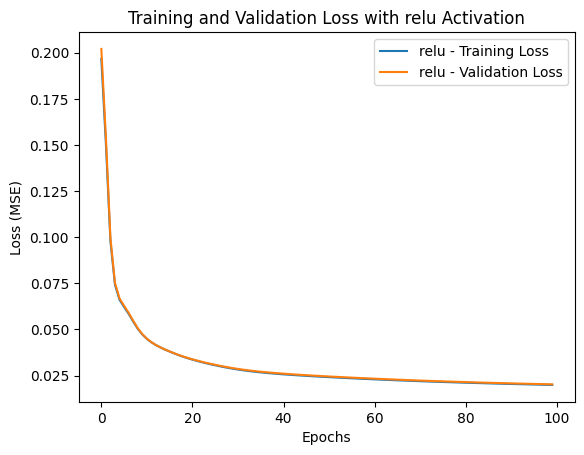

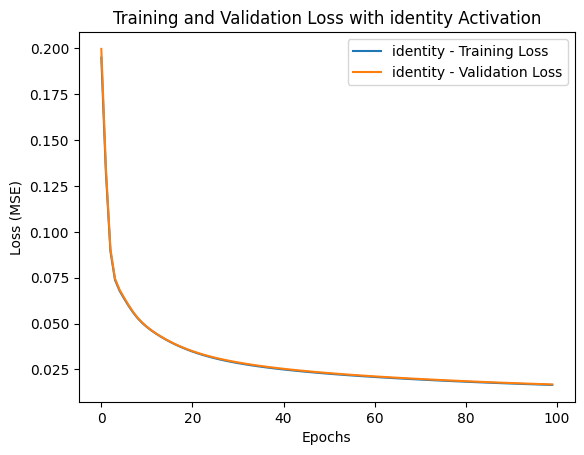

In [21]:
for activation in models.keys():
    plt.plot(losses[activation]['train'], label=f"{activation} - Training Loss")
    plt.plot(losses[activation]['val'], label=f"{activation} - Validation Loss")
    
    plt.xlabel("Epochs")
    plt.ylabel("Loss (MSE)")
    plt.title(f"Training and Validation Loss with {activation} Activation")
    plt.legend()
    plt.show()


printing  the newly regenerated images


Regenerated images with relu activation:


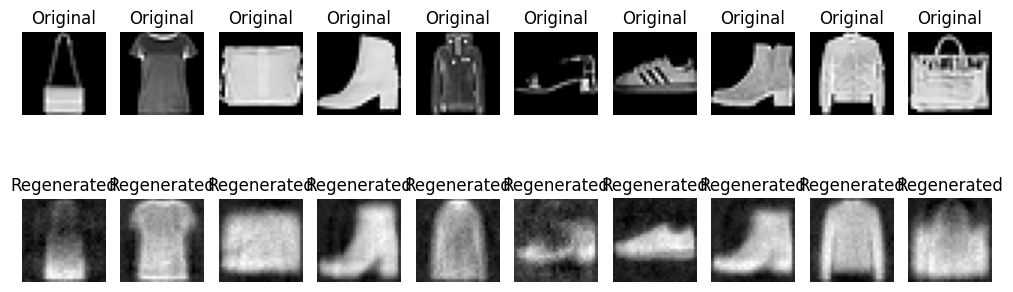


Regenerated images with identity activation:


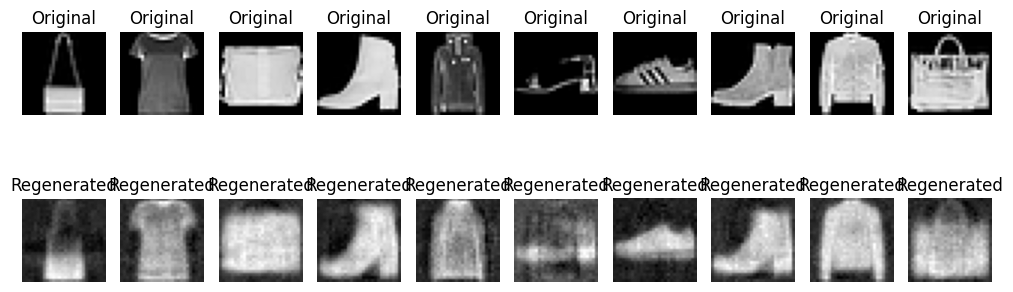

In [22]:
sample_indices = np.random.choice(len(X_test), 10, replace=False)

for activation, model in models.items():
    print(f"\nRegenerated images with {activation} activation:")
    plt.figure(figsize=(10, 4))
    for i, idx in enumerate(sample_indices):
        plt.subplot(2, 10, i + 1)
        plt.imshow(X_test[idx].reshape(28, 28), cmap="gray")
        plt.title("Original")
        plt.axis("off")
        
        regenerated_img = model.predict([X_test[idx]]).reshape(28, 28)
        plt.subplot(2, 10, i + 11)
        plt.imshow(regenerated_img, cmap="gray")
        plt.title("Regenerated")
        plt.axis("off")
    plt.tight_layout()
    plt.show()


####  5. (3 points) Lastly, from the two neural networks trained above extract the feature vector of size ‘a’ for the train and test data samples. Using this vector as your new set of image features, train two new smaller MLP Classifiers with 2 layers, each of size ‘a’ on the training dataset and report accuracy metrics for both these classifiers. Train it for 200 iterations with the same solver and learning rate as part 2. Contrast this with the MLP Classifier you trained in part 2 and report possible reasons why this method still gives you a decent classifier?

extracting features

In [23]:
import numpy as np

def extract_features(model, X, layer_index=2):
    activations = X.copy()
    
    for i in range(layer_index + 1):
        activations = np.dot(activations, model.coefs_[i]) + model.intercepts_[i]
        
        if model.activation == 'relu':
            activations = np.maximum(0, activations)
        elif model.activation == 'identity':
            pass
        elif model.activation == 'logistic':
            activations = 1 / (1 + np.exp(-activations))  # Sigmoid
        elif model.activation == 'tanh':
            activations = np.tanh(activations)  # Tanh activation
    
    return activations

# Extract features for train and test data using specific models
X_train_features_relu = extract_features(models['relu'], X_train, layer_index=2)
X_test_features_relu = extract_features(models['relu'], X_test, layer_index=2)

X_train_features_identity = extract_features(models['identity'], X_train, layer_index=2)
X_test_features_identity = extract_features(models['identity'], X_test, layer_index=2)


importing libraries


In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
from sklearn.exceptions import ConvergenceWarning

printing accurac scores with aabove output of the above trained relu and identity mmlp classifiers

In [27]:

warnings.filterwarnings("ignore", category=ConvergenceWarning)

small_mlp_params = {
    'hidden_layer_sizes': (64, 64),
    'activation': 'relu',  # For both classifiers, use ReLU activation
    'solver': 'adam',
    'max_iter': 200,
    'learning_rate_init': 2e-5,
    'batch_size': 128,
    'random_state': 42
}

small_mlp_relu = MLPClassifier(**small_mlp_params)
small_mlp_relu.fit(X_train_features_relu, y_train)

y_pred_relu = small_mlp_relu.predict(X_test_features_relu)
print("Classification metrics for small MLP trained on 'relu' features:")
print(classification_report(y_test, y_pred_relu))

small_mlp_identity = MLPClassifier(**small_mlp_params)
small_mlp_identity.fit(X_train_features_identity, y_train)

y_pred_identity = small_mlp_identity.predict(X_test_features_identity)
print("Classification metrics for small MLP trained on 'identity' features:")
print(classification_report(y_test, y_pred_identity))


Classification metrics for small MLP trained on 'relu' features:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       195
           1       0.94      0.93      0.93       189
           2       0.66      0.60      0.63       205
           3       0.81      0.88      0.84       200
           4       0.67      0.69      0.68       199
           5       0.92      0.82      0.87       202
           6       0.48      0.44      0.46       213
           7       0.83      0.85      0.84       204
           8       0.90      0.90      0.90       188
           9       0.85      0.92      0.88       205

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.78      0.78      0.78      2000

Classification metrics for small MLP trained on 'identity' features:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       19

### Classification metrics for small MLP trained on 'relu' features:

| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.75      | 0.81   | 0.78     | 195     |
| 1     | 0.94      | 0.93   | 0.93     | 189     |
| 2     | 0.66      | 0.60   | 0.63     | 205     |
| 3     | 0.81      | 0.88   | 0.84     | 200     |
| 4     | 0.67      | 0.69   | 0.68     | 199     |
| 5     | 0.92      | 0.82   | 0.87     | 202     |
| 6     | 0.48      | 0.44   | 0.46     | 213     |
| 7     | 0.83      | 0.85   | 0.84     | 204     |
| 8     | 0.90      | 0.90   | 0.90     | 188     |
| 9     | 0.85      | 0.92   | 0.88     | 205     |

| Metric        | Value |
|---------------|-------|
| Accuracy     | 0.78  |
| Macro avg    | 0.78  |
| Weighted avg | 0.78  |

---

### Classification metrics for small MLP trained on 'identity' features:

| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.74      | 0.78   | 0.76     | 195     |
| 1     | 0.98      | 0.95   | 0.96     | 189     |
| 2     | 0.71      | 0.69   | 0.70     | 205     |
| 3     | 0.84      | 0.89   | 0.87     | 200     |
| 4     | 0.74      | 0.78   | 0.76     | 199     |
| 5     | 0.93      | 0.85   | 0.89     | 202     |
| 6     | 0.60      | 0.53   | 0.56     | 213     |
| 7     | 0.85      | 0.88   | 0.86     | 204     |
| 8     | 0.95      | 0.95   | 0.95     | 188     |
| 9     | 0.86      | 0.92   | 0.89     | 205     |

| Metric        | Value |
|---------------|-------|
| Accuracy     | 0.82  |
| Macro avg    | 0.82  |
| Weighted avg | 0.82  |


